<a href="https://colab.research.google.com/github/aravindh698/TCSION-INTERNSHIP/blob/main/tcsion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HYPOTHESIS GENERATION:
1. From Train DataSet it is seen that

*   The sales is Higher at 7th month
*   Second store shows maximal sale
*   The year 2017 shows a maximal sale at store 2
*   items 13,15,28,22,38,45 are soled maximally
*   Sale is higher at weekends











We need to import the needed packages 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


We now load the data sets into two different dataframes

In [24]:
df1=pd.read_csv('/content/train.csv')
df2=pd.read_csv('/content/test.csv')

**Data Cleaning**

Cleaning means to

1.  removing the unwanted noisy data,
2.  removing NAN value

1.   dropping unwanted columns
2.   Checking the datatype and converting it to proper format





Now need to check for missing values in df1

In [25]:
df1.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

Now need to check for missing values in df2

In [26]:
df2.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

Now we check the datatype of Dataframe df1

In [27]:
df1.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

Now we check the datatype of Dataframe df2

In [28]:
df2.dtypes

id        int64
date     object
store     int64
item      int64
dtype: object

We now create a copy of original data to avoid changes we make while making featrure extraction and predictions

In [29]:
train_original=df1.copy()
test_original=df2.copy()

In [30]:
df1.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [31]:
df2.columns

Index(['id', 'date', 'store', 'item'], dtype='object')

Now we check the shape of the Dataframe to be trained 

In [32]:
df1.shape

(913000, 4)

Now we check the shape of the Dataframe to be tested

In [33]:
df2.shape

(45000, 4)

From datatype we found that date is in object type which is to be converted to datetime format 

In [34]:
df1['date']= pd.to_datetime(df1.date,format='%Y-%m-%d')
df2['date']= pd.to_datetime(df2.date,format='%Y-%m-%d')
train_original['date']= pd.to_datetime(train_original.date,format='%Y-%m-%d')
test_original['date']= pd.to_datetime(test_original.date,format='%Y-%m-%d')

In [35]:
for i in (df1,df2,train_original,test_original):
  i['year']=i.date.dt.year
  i['month']=i.date.dt.month
  i['day']=i.date.dt.dayofweek

In [36]:
df1.head(14)

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
5,2013-01-06,1,1,12,2013,1,6
6,2013-01-07,1,1,10,2013,1,0
7,2013-01-08,1,1,9,2013,1,1
8,2013-01-09,1,1,12,2013,1,2
9,2013-01-10,1,1,9,2013,1,3


In [37]:
df1 = df1.set_index('date')
df1.head()

,store,item,sales,year,month,day
date,,,,,,
2013-01-01,1,1,13,2013,1,1
2013-01-02,1,1,11,2013,1,2
2013-01-03,1,1,14,2013,1,3
2013-01-04,1,1,13,2013,1,4
2013-01-05,1,1,10,2013,1,5


Now we try to analyse the hypothesis generated 
first we try to plot sales in a year

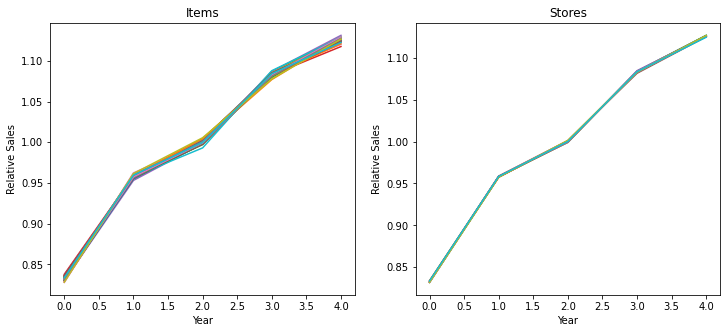

In [38]:
agg_year_item = pd.pivot_table(df1, index='year', columns='item',
                               values='sales', aggfunc=np.mean).values
agg_year_store = pd.pivot_table(df1, index='year', columns='store',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_year_item / agg_year_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_year_store / agg_year_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.show()

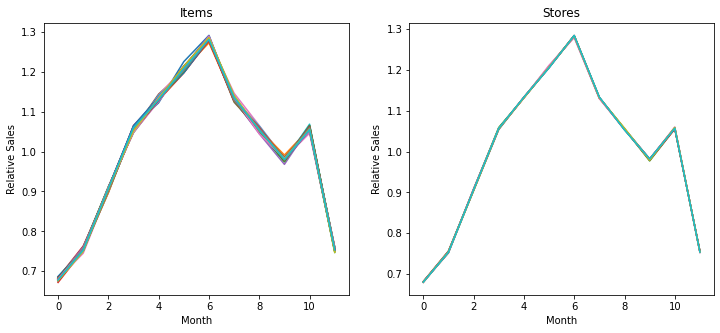

In [39]:
agg_month_item = pd.pivot_table(df1, index='month', columns='item',
                               values='sales', aggfunc=np.mean).values
agg_month_store = pd.pivot_table(df1, index='month', columns='store',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_month_item / agg_month_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_month_store / agg_month_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.show()

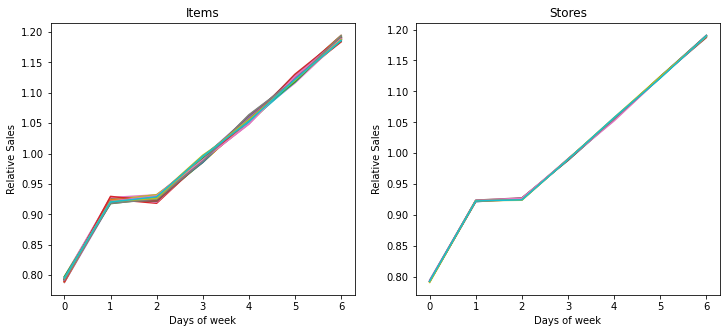

In [40]:
agg_weekly_item = pd.pivot_table(df1, index='day', columns='item',
                               values='sales', aggfunc=np.mean).values
agg_weekly_store = pd.pivot_table(df1, index='day', columns='store',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_weekly_item / agg_weekly_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Days of week")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_weekly_store / agg_weekly_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Days of week")
plt.ylabel("Relative Sales")
plt.show()

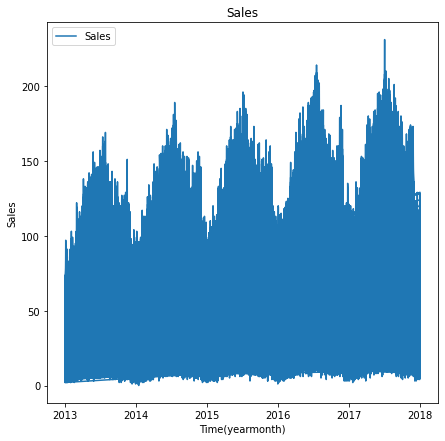

In [41]:

ts=df1['sales']
plt.figure(figsize=(7,7))
plt.plot(ts,label='Sales')
plt.title('Sales')
plt.xlabel('Time(yearmonth)')
plt.ylabel('Sales')
plt.legend(loc='best')


To make visualation and to analyse still effectively we use bar chart here on years and sales

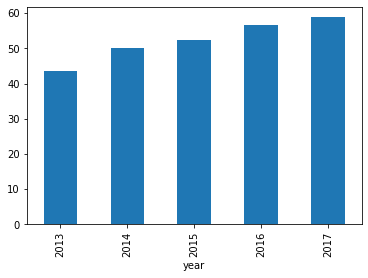

In [42]:
df1.groupby('year')['sales'].mean().plot.bar()

Now the next Hypothesis is verified

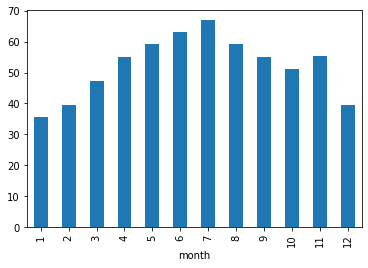

In [43]:
df1.groupby('month')['sales'].mean().plot.bar()

Now we plot a graph to analyse the month and year
we can observe a cyclic pattern 

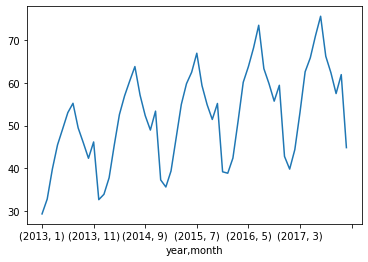

In [44]:
temp=df1.groupby(['year','month'])['sales'].mean()
temp.plot()

Next Hypothesis is observed

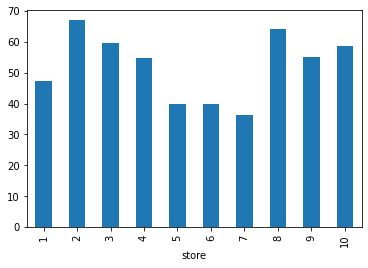

In [45]:
df1.groupby('store')['sales'].mean().plot.bar()

Next Hypothesis is verified

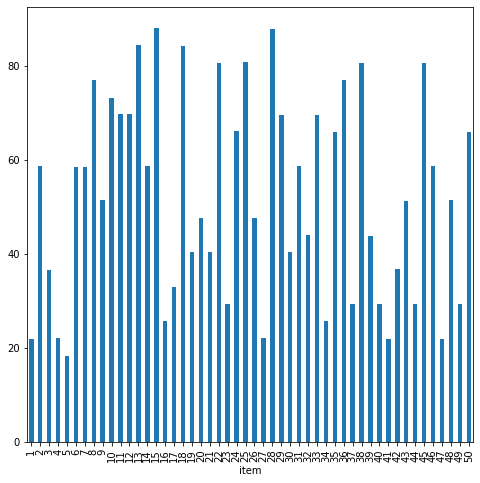

In [46]:
df1.groupby('item')['sales'].mean().plot.bar(figsize=(8,8))

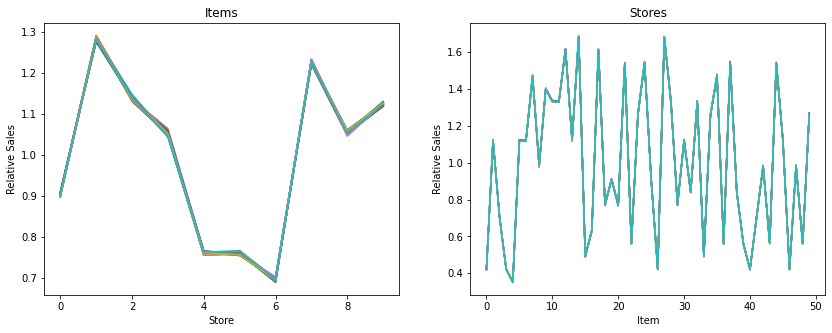

In [50]:


agg_store_item = pd.pivot_table(df1, index='store', columns='item',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(agg_store_item / agg_store_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Store")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_store_item.T / agg_store_item.T.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Item")
plt.ylabel("Relative Sales")
plt.show()

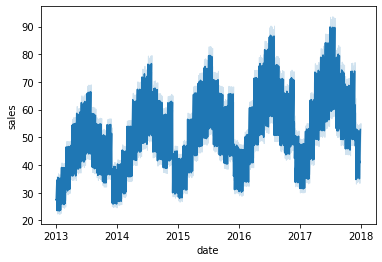

In [53]:
import seaborn as sns
sns.lineplot(x="date",y="sales",legend="full",data=df1)

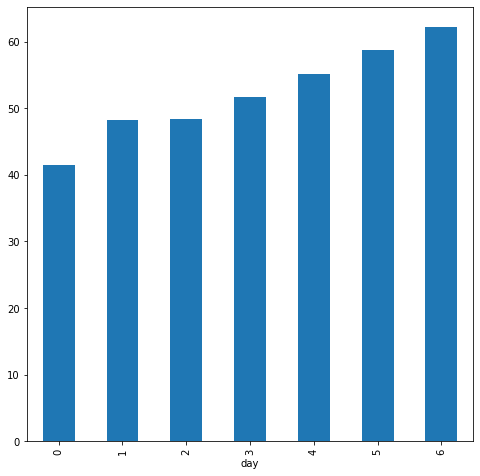

In [55]:
df1.groupby('day')['sales'].mean().plot.bar(figsize=(8,8))

<Figure size 432x288 with 0 Axes>

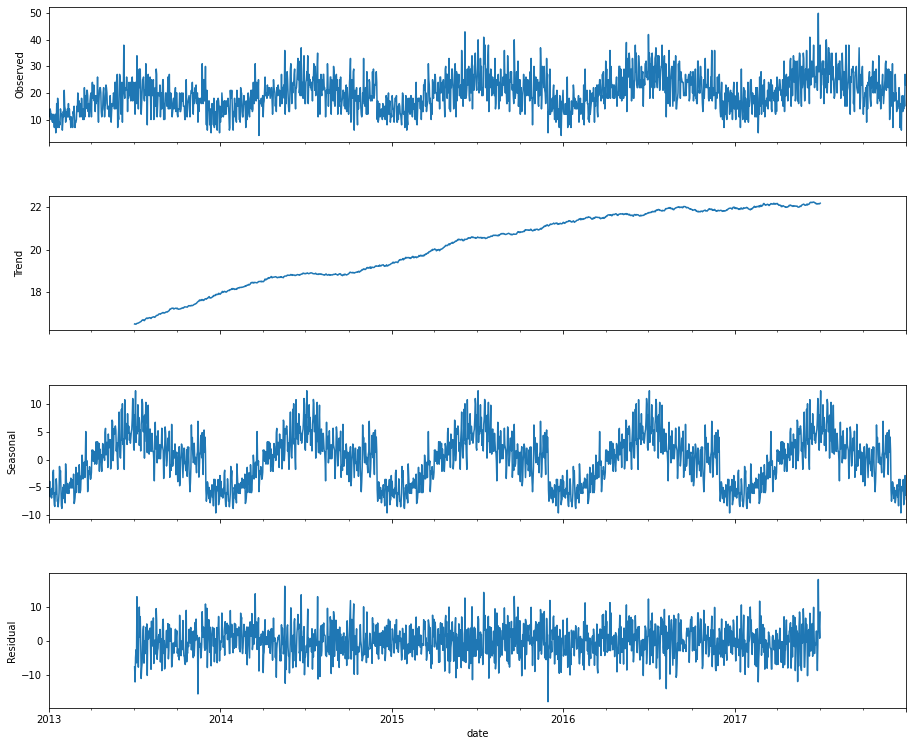

In [58]:
train_item1 = df1[df1['item']==1]
train_final = train_item1[train_item1['store']==1]

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_final['sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(14, 12)

From the Above Graphs ploted its obvious to see the seasonality and trend patterns. But we need to remove them as we need to find any other patterns that help us predict in better way 

Now Statistically we can check the dataset to say whether it is  a staionary or not using 2 ways,
1.   Augmented Dickey-Fuller test 
2.   Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test 

I have used KPSS to check stationary or not

In [60]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values = kpss(df1['sales'],'c')
print(f'Test_Staticstics: {stats} ')
print(f'p-value: {p} ')
print(f'Crirtical-value: {critical_values} ')
if p < 0.05:
  print('Not Sationary')
else:
  print('Stationary')  
        

Test_Staticstics: 15.285021355158484 
p-value: 0.01 
Crirtical-value: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739} 
Not Sationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Now we shall check with adf test

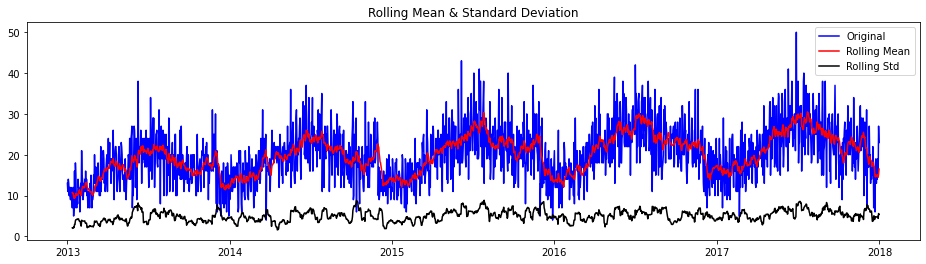

In [59]:
def roll_stats(timeseries, window = 12, cutoff = 0.01):
    
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(16, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
   # plt.rcParams['agg.path.chunksize'] = 50000
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
roll_stats(train_final['sales'])    

Now we came to know that the dataset and the attribute is not sationary so we need to change it to stationary one,
A stationary pattern is a one with,


1.   mean = 0
2.   varience = constant
1.   no seasonality






In [64]:
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic

def dickey_fuller_test(timeseries, window = 12, cutoff = 0.01):
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)
    
dickey_fuller_test(train_final['sales'])  

p-value = 0.0361. The series is likely non-stationary.
Test Statistic                   -2.987278
p-value                           0.036100
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


date
2013-01-02   -2.0
2013-01-03    3.0
2013-01-04   -1.0
2013-01-05   -3.0
2013-01-06    2.0
Name: sales, dtype: float64


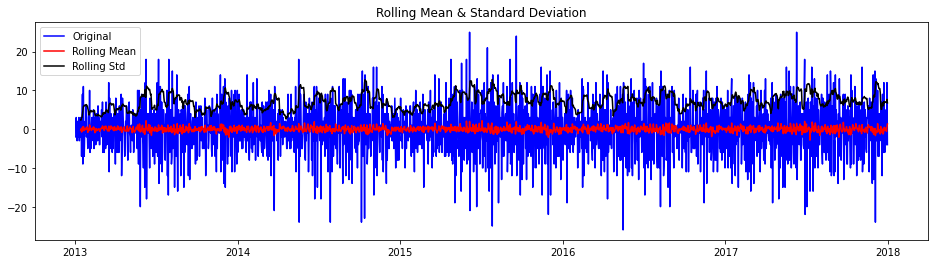

p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.520810e+01
p-value                        5.705031e-28
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [65]:
first_diff = train_final.sales - train_final.sales.shift(1)
first_diff = first_diff.dropna(inplace = False)
print(first_diff.head())
roll_stats(first_diff,window = 12, cutoff = 0.01)
dickey_fuller_test(first_diff, window = 12)

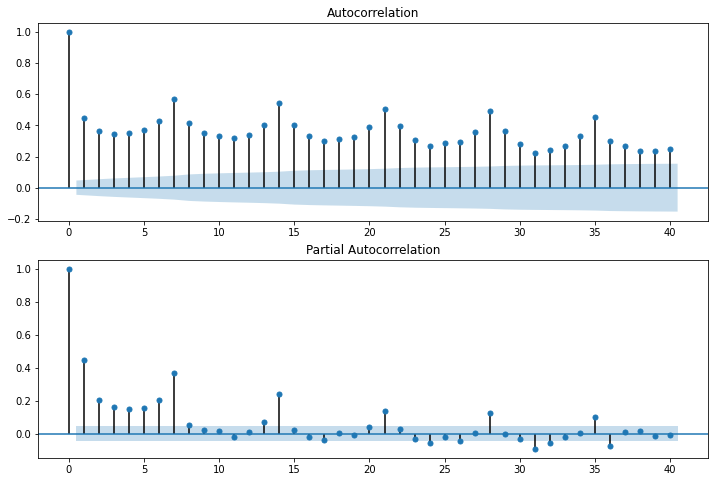

In [66]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_final.sales, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_final.sales, lags=40, ax=ax2)# , lags=40

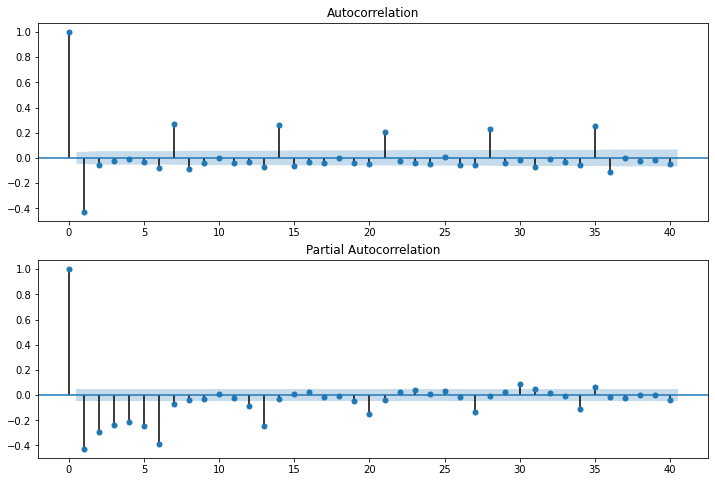

In [67]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

In [68]:
arima_model = sm.tsa.ARIMA(train_final.sales, (6,1,0)).fit(disp=False)
print(arima_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                 1825
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -5597.668
Method:                       css-mle   S.D. of innovations              5.195
Date:                Tue, 13 Jul 2021   AIC                          11211.335
Time:                        02:10:30   BIC                          11255.410
Sample:                    01-02-2013   HQIC                         11227.594
                         - 12-31-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0039      0.025      0.152      0.879      -0.046       0.054
ar.L1.D.sales    -0.8174      0.022    -37.921      0.000      -0.860      -0.775
ar.L2.D.sales    -0.7497      0.026    -

NormaltestResult(statistic=16.426387689817304, pvalue=0.0002710536340863827)


Text(0.5, 1.0, 'Residual distribution')

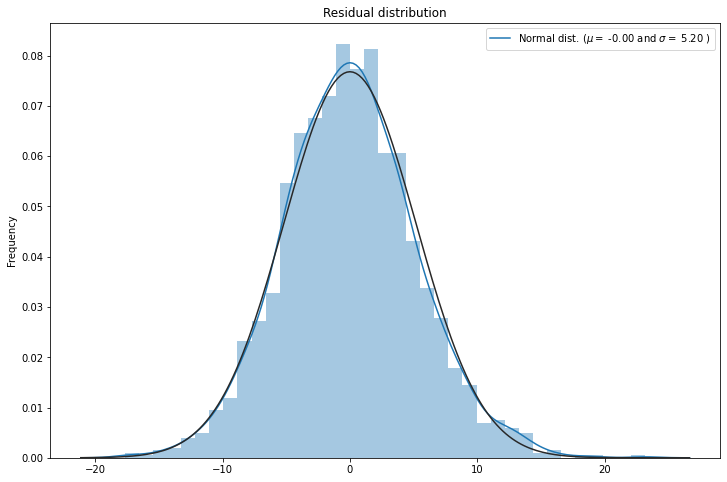

In [69]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_model.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')

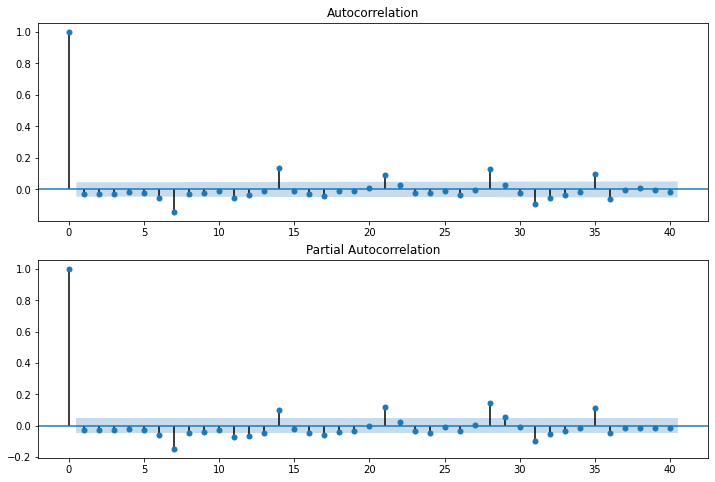

In [70]:
# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_model.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_model.resid, lags=40, ax=ax2)

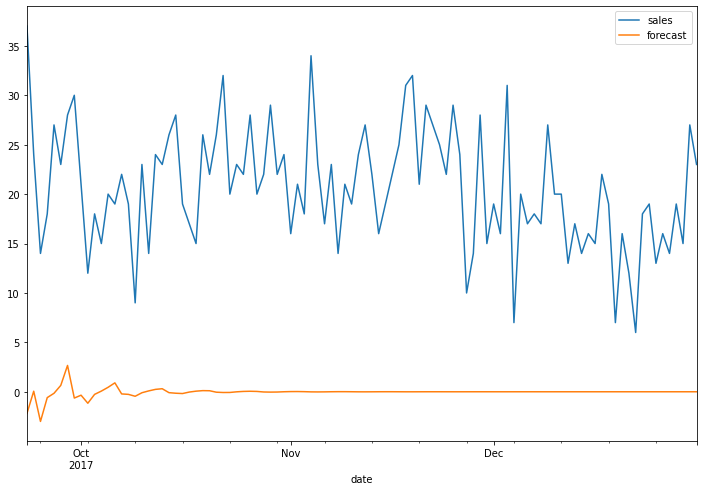

In [72]:
start_index = 1726
end_index = 1826
df1['forecast'] = arima_model.predict(start = start_index, end= end_index, dynamic= True)  
df1[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))

In [73]:
sarima_model = sm.tsa.statespace.SARIMAX(train_final.sales, trend='n', order=(6,1,0)).fit()
print(sarima_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  sales   No. Observations:                 1826
Model:               SARIMAX(6, 1, 0)   Log Likelihood               -5597.679
Date:                Tue, 13 Jul 2021   AIC                          11209.359
Time:                        02:12:20   BIC                          11247.924
Sample:                    01-01-2013   HQIC                         11223.585
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8174      0.021    -39.063      0.000      -0.858      -0.776
ar.L2         -0.7497      0.025    -30.480      0.000      -0.798      -0.702
ar.L3         -0.6900      0.026    -26.686      0.0

NormaltestResult(statistic=16.742690143436878, pvalue=0.00023140408921805145)


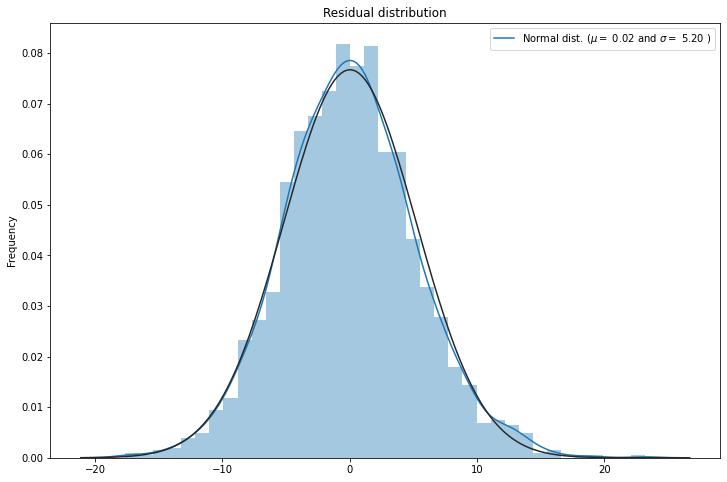

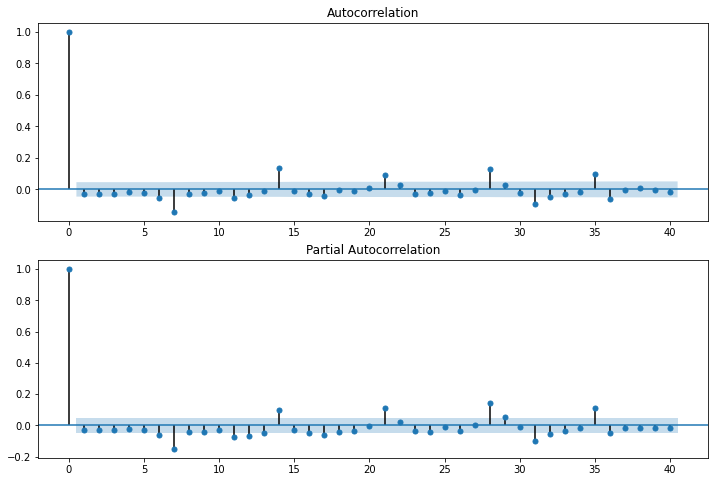

In [74]:
resid = sarima_model.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')

# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarima_model.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarima_model.resid, lags=40, ax=ax2)

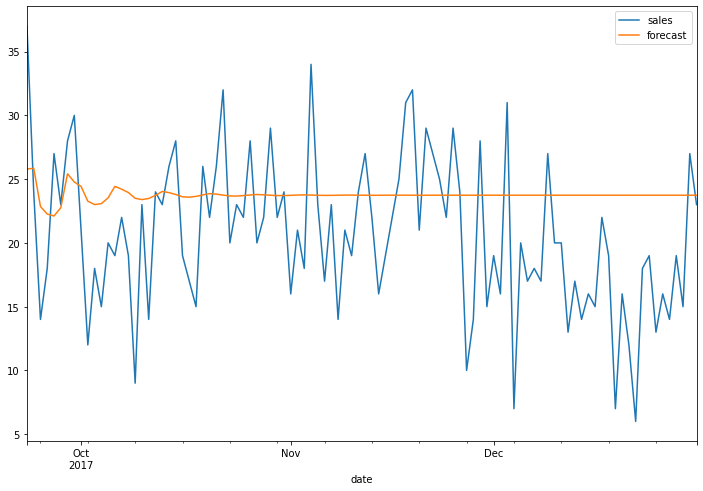

In [75]:
start_index = 1726
end_index = 1826
df1['forecast'] = sarima_model.predict(start = start_index, end= end_index, dynamic= True)  
df1[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))